<a href="https://colab.research.google.com/github/badhansaha7198/Mchine-Learning-Project/blob/main/Detection_of_Breast_Cancer_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading data from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/data1.csv')
df.head(7)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2


In [ ]:
#Number of rows and columns in data set
df.shape

(683, 11)

In [ ]:
#counting the number of empty values in each column
df.isna().sum() 

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
#Get a number of the Malignant (4) and Bening (2) cells
df['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


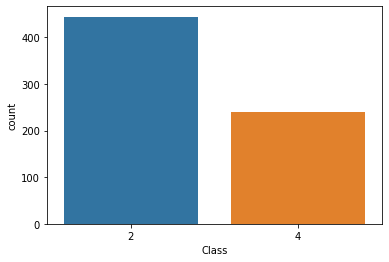

In [ ]:
#Visualize the count
sns.countplot(df['Class'], label='count')

In [ ]:
#Correlation of columns
df.iloc[:,1:11].corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


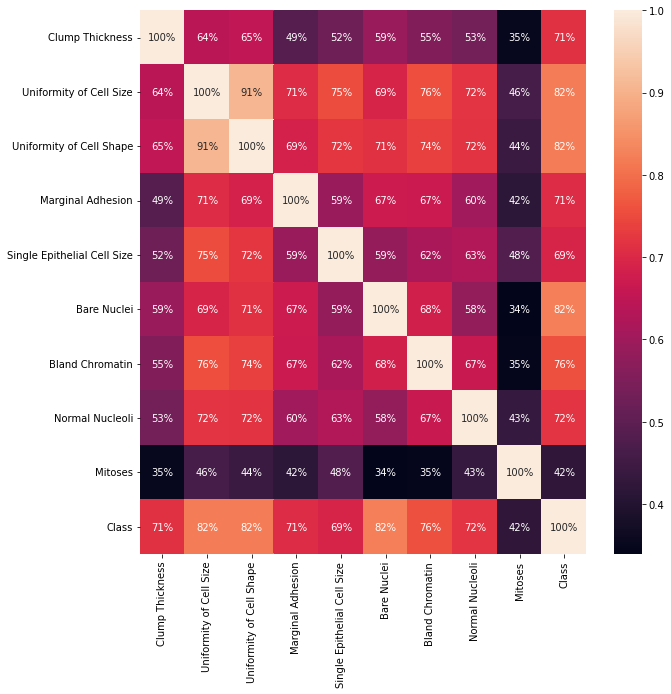

In [ ]:
#Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:11].corr(), annot=True, fmt='.0%')

In [ ]:
#Split the data set into independent(X) and dependent(y) data set
X = df.iloc[:,1:10].values
y = df.iloc[:,10].values

In [ ]:
#Train_Test_Split 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#Creat function for the models
def models(X_train, y_train):

  #SVM
  from sklearn.svm import SVC
  svm = SVC(gamma='auto')
  svm.fit(X_train, y_train)

  #KNN
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors=5)
  knn.fit(X_train, y_train)

  #Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train, y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
  tree.fit(X_train, y_train)

  #Random Forest
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
  forest.fit(X_train, y_train)

  #Model accuracy
  print('[0] Support Vector Machine Training Accuracy: ', svm.score(X_train, y_train))
  print('[1] K-nearest neighbors Training Accuracy: ', knn.score(X_train, y_train))
  print('[2] Logistic Regression Training Accuracy: ', log.score(X_train, y_train))
  print('[3] Decision Tree Training Accuracy: ', tree.score(X_train, y_train))
  print('[4] Random Forest Training Accuracy: ', forest.score(X_train, y_train))
  

  return svm, knn, log, tree, forest

In [ ]:
#Getting all of the models training accuracy
model = models(X_train, y_train)

[0] Support Vector Machine Training Accuracy:  0.9725274725274725
[1] K-nearest neighbors Training Accuracy:  0.9725274725274725
[2] Logistic Regression Training Accuracy:  0.9743589743589743
[3] Decision Tree Training Accuracy:  1.0
[4] Random Forest Training Accuracy:  0.9963369963369964


In [ ]:
#Getting all of the models testing accuracy
from sklearn.metrics import confusion_matrix

for i in range( len(model) ):
  print('Model: ', i)
  cm = confusion_matrix(y_test, model[i].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print(cm)
  print('Testing Accuracy = ', (TP + TN) / (TP + TN +FN + FP))
  print()

Model:  0
[[82  5]
 [ 1 49]]
Testing Accuracy =  0.9562043795620438

Model:  1
[[82  5]
 [ 2 48]]
Testing Accuracy =  0.948905109489051

Model:  2
[[84  3]
 [ 3 47]]
Testing Accuracy =  0.9562043795620438

Model:  3
[[84  3]
 [ 3 47]]
Testing Accuracy =  0.9562043795620438

Model:  4
[[83  4]
 [ 1 49]]
Testing Accuracy =  0.9635036496350365

